In [1]:
# import standard packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import sklearn pipeline & preprocessing packages
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#import imblearn packages for imbalanced data
#from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
#from imblearn.combine import SMOTETomek

#import sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


#import sklearn metrics 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score 

import warnings
warnings.simplefilter('ignore')


In [2]:
#get column names
column_names = pd.read_csv('../data_files/processed/X_train_st.csv').columns

#import data sets
X_train_st = pd.read_csv('../data_files/processed/X_train_st.csv').values
X_test = pd.read_csv('../data_files/processed/X_test.csv').values
y_train_st = pd.read_csv('../data_files/processed/y_train_st.csv').values
y_test = pd.read_csv('../data_files/processed/y_test.csv').values

In [3]:
print(column_names)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Number_of_Services',
       'gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenureGroups_13 - 24', 'tenureGroups_25 - 36', 'tenureGroups_37 - 48',
       'tenureGroups_49 - 60', 'tenureGroups_6

In [4]:
print("the shape of X_train_st is:", X_train_st.shape)
print("the shape of y_train_st is:", y_train_st.shape)
print("the shape of X_test is:", X_test.shape)
print("the shape of y_test is:", y_test.shape)

the shape of X_train_st is: (7928, 38)
the shape of y_train_st is: (7928, 1)
the shape of X_test is: (1407, 38)
the shape of y_test is: (1407, 1)


In [5]:
#reshape y_train_st and y_test to a 1D arrays
y_train_st = y_train_st.reshape(-1)
y_test = y_test.reshape(-1)
print("the shape of y_train_st is:", y_train_st.shape)
print("the shape of y_test is:", y_test.shape)

the shape of y_train_st is: (7928,)
the shape of y_test is: (1407,)


As this is a classification project, we will try the following models:  RandomForest, GradientBoosting, Logistic Regression and KNearestNeighbors.  

Note that my training datasets for the records resampled through SMOTETomek are now X_train_st, y_train_st.

The original X_test and y_test data has been unchanged.

## Logistic Regression Model



In [6]:
#Generate my base model  (default params)
base = LogisticRegression()

#fit my base model
base.fit(X_train_st, y_train_st)

#base predictions
y_pred_base = base.predict(X_test)

#record base logistic regression metrics (accuracy score and classification report)
result_base = accuracy_score(y_test, y_pred_base)
cr_base = classification_report(y_test, y_pred_base, target_names=['Active Customers', 'Churned Customers'])

#print accuracy score and classification report for base model
print("Accuracy score for base logistic regression model is: ", result_base)
print("The classification report for the base logistic regression model:")
print(cr_base)


Accuracy score for base logistic regression model is:  0.757640369580668
The classification report for the base logistic regression model:
                   precision    recall  f1-score   support

 Active Customers       0.91      0.74      0.82      1033
Churned Customers       0.53      0.81      0.64       374

         accuracy                           0.76      1407
        macro avg       0.72      0.77      0.73      1407
     weighted avg       0.81      0.76      0.77      1407



In [7]:
#instantiate Logistic regression classifer
lr = LogisticRegression()

#create my param grid
params_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [50, 100]}

In [8]:
lr_grid = GridSearchCV(
    estimator= lr,
    param_grid = params_lr,
    scoring = 'accuracy',
    cv = 5,
    refit=True,
    return_train_score=True)

In [9]:
# fit our data to lr model
lr_grid.fit(X_train_st, y_train_st)

#make predictions
y_preds = lr_grid.predict(X_test)

#calculate the predicted probabilities
y_prob_lr = lr_grid.predict_proba(X_test)[:,1]

In [10]:
# look at the best parameters and the best score
print("The best parameters for logistic regression are: ", lr_grid.best_params_)
print("Generating the best score: ", lr_grid.best_score_)

The best parameters for logistic regression are:  {'C': 10, 'max_iter': 50, 'solver': 'lbfgs'}
Generating the best score:  0.7898597746050815


[[764 269]
 [ 74 300]]


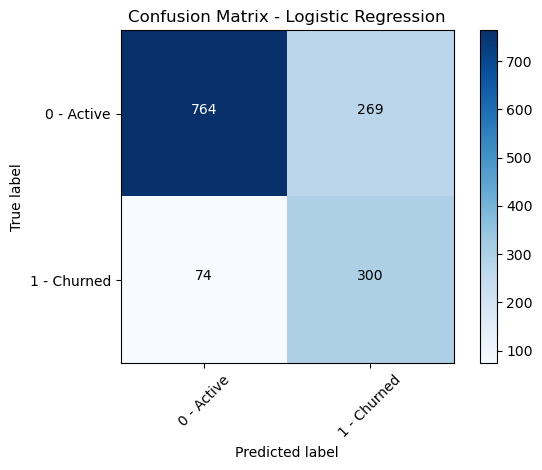

In [11]:
#plot confusion matrix for the logistic regression model
import itertools
classes = ['0 - Active', '1 - Churned']
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds)
print(cnf_matrix)

# Plot confusion matrix
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()



In [12]:
print("Classification Report for logistic regression model")
print(classification_report(y_test, y_preds, target_names=['Active Customer', 'Churned Customer']))

Classification Report for logistic regression model
                  precision    recall  f1-score   support

 Active Customer       0.91      0.74      0.82      1033
Churned Customer       0.53      0.80      0.64       374

        accuracy                           0.76      1407
       macro avg       0.72      0.77      0.73      1407
    weighted avg       0.81      0.76      0.77      1407



Although this model did pretty well at identifying our active customers, it is still very ambiguous as to whether a customer will realy churn.  It specifically misclassified 269 customers that are still active as predicted to churn.
We will move on to Random Forest to see how it performs.

## Random Forest Model



In [13]:
#Generate my base model  (default params)
base_rf = RandomForestClassifier()

#fit my base model
base_rf.fit(X_train_st, y_train_st)

#base predictions
y_pred_base_rf = base_rf.predict(X_test)

#record base random forest metrics (accuracy score and classification report)
result_base_rf = accuracy_score(y_test, y_pred_base_rf)
cr_base_rf = classification_report(y_test, y_pred_base_rf, target_names=['Active Customer', 'Churned Customer'])

#print accuracy score and classification report for base model
print("Accuracy score for base random forest model is: ", result_base_rf)
print("The classification report for the base random forest model:")
print(cr_base_rf)

Accuracy score for base random forest model is:  0.7974413646055437
The classification report for the base random forest model:
                  precision    recall  f1-score   support

 Active Customer       0.85      0.88      0.86      1033
Churned Customer       0.63      0.56      0.60       374

        accuracy                           0.80      1407
       macro avg       0.74      0.72      0.73      1407
    weighted avg       0.79      0.80      0.79      1407



In [14]:
#instantiate random forest classifer
rf = RandomForestClassifier()

#create my param grid
params_rf = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1,2,5]}

In [15]:
rf_grid = GridSearchCV(
    estimator= rf,
    param_grid = params_rf,
    scoring = 'accuracy',
    cv = 5,
    refit=True,
    return_train_score=True)

In [16]:
# fit our data to rf model
rf_grid.fit(X_train_st, y_train_st)

#make predictions
y_preds_rf = rf_grid.predict(X_test)

#calculate the predicted probabilities
y_prob_rf = rf_grid.predict_proba(X_test)[:,1]

In [17]:
# look at the best parameters and the best score
print("The best parameters for random forest are: ", rf_grid.best_params_)
print("Generating the best score: ", rf_grid.best_score_)

The best parameters for random forest are:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}
Generating the best score:  0.8762701238359304


[[887 146]
 [148 226]]


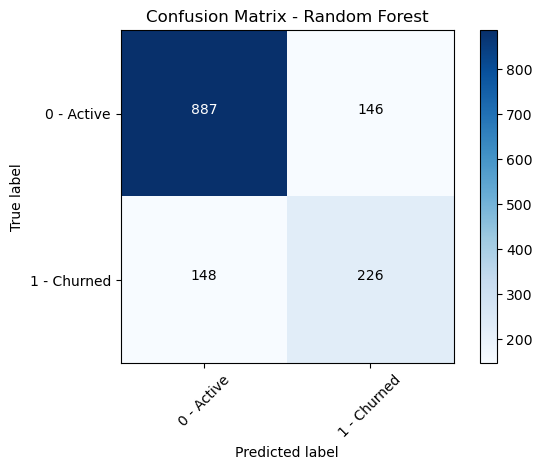

In [18]:
#plot confusion matrix for the random forest model
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds_rf)
print(cnf_matrix)

# Plot confusion matrix
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [19]:
print("Classification Report for random forest model")
print(classification_report(y_test, y_preds_rf, target_names=['Active Customer', 'Churned Customer']))

Classification Report for random forest model
                  precision    recall  f1-score   support

 Active Customer       0.86      0.86      0.86      1033
Churned Customer       0.61      0.60      0.61       374

        accuracy                           0.79      1407
       macro avg       0.73      0.73      0.73      1407
    weighted avg       0.79      0.79      0.79      1407



The random forest model's performance was only marginally lower than the logistic regression model.  Next, we will try the gradientboosting classification model.

## GradientBoosting Model



In [20]:
#Generate my base model  (default params)
base_gb = GradientBoostingClassifier()

#fit my base model
base_gb.fit(X_train_st, y_train_st)

#base predictions
y_pred_base_gb = base_gb.predict(X_test)

#record base gradient boosting metrics (accuracy score and classification report)
result_base_gb = accuracy_score(y_test, y_pred_base_gb)
cr_base_gb = classification_report(y_test, y_pred_base_gb, target_names=['Active Customers', 'Churned Customers'])

#print accuracy score and classification report for base model
print("Accuracy score for base gradient boosting model is: ", result_base_gb)
print("The classification report for the base gradient boosting model:")
print(cr_base_gb)

Accuracy score for base gradient boosting model is:  0.7924662402274343
The classification report for the base gradient boosting model:
                   precision    recall  f1-score   support

 Active Customers       0.87      0.84      0.86      1033
Churned Customers       0.60      0.65      0.62       374

         accuracy                           0.79      1407
        macro avg       0.74      0.75      0.74      1407
     weighted avg       0.80      0.79      0.79      1407



In [21]:
#instantiate gradient boosting classifer
gb = GradientBoostingClassifier()

#create my param grid
params_gb = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5],
    'max_features': [2,5,10,15]}

In [22]:
gb_grid = GridSearchCV(
    estimator= gb,
    param_grid = params_gb,
    scoring = 'accuracy',
    cv = 5,
    refit=True,
    return_train_score=True)

In [23]:
# fit our data to gb model
gb_grid.fit(X_train_st, y_train_st)

#make predictions
y_preds_gb = gb_grid.predict(X_test)

#calculate the predicted probabilities
y_prob_gb = gb_grid.predict_proba(X_test)[:,1]

In [24]:
# look at the best parameters and the best score
print("The best parameters for gradient boosting are: ", gb_grid.best_params_)
print("Generating the best score: ", gb_grid.best_score_)

The best parameters for gradient boosting are:  {'learning_rate': 0.5, 'max_features': 2, 'n_estimators': 100}
Generating the best score:  0.8594988483616504


[[866 167]
 [135 239]]


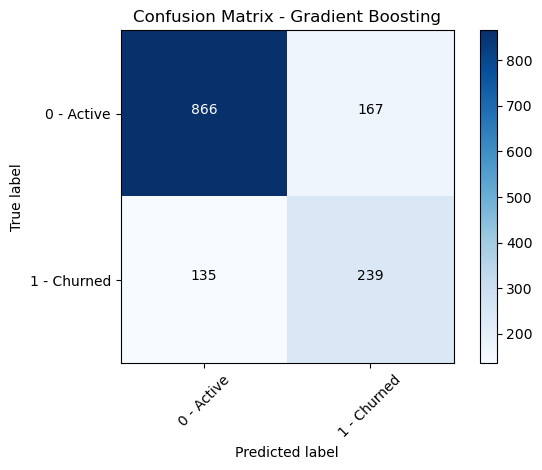

In [25]:
#plot confusion matrix for the gradient boosting model
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds_gb)
print(cnf_matrix)

# Plot confusion matrix
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [26]:
print("Classification Report for gradient boosting model")
print(classification_report(y_test, y_preds_gb, target_names=['Active Customers', 'Churned Customers']))

Classification Report for gradient boosting model
                   precision    recall  f1-score   support

 Active Customers       0.87      0.84      0.85      1033
Churned Customers       0.59      0.64      0.61       374

         accuracy                           0.79      1407
        macro avg       0.73      0.74      0.73      1407
     weighted avg       0.79      0.79      0.79      1407



After 3 models, it would still appear that the best is the logistic regression model.  It's score is inline with the rest, but is computationally less expensive than
the other models.  We will try two more models, KNearestNeighbor and Support Vector machines.

## KNearest Neighbor Model



In [27]:
#Generate my base model  (default params)
base_knn = KNeighborsClassifier()

#fit my base model
base_knn.fit(X_train_st, y_train_st)

#base predictions
y_pred_base_knn = base_knn.predict(X_test)

#record base KNN metrics (accuracy score and classification report)
result_base_knn = accuracy_score(y_test, y_pred_base_knn)
cr_base_knn = classification_report(y_test, y_pred_base_knn, target_names=['Active Customers', 'Churned Customers'])

#print accuracy score and classification report for base model
print("Accuracy score for base KNearest neighbor model is: ", result_base_knn)
print("The classification report for the base KNearest neighbor model:")
print(cr_base_knn)

Accuracy score for base KNearest neighbor model is:  0.7036247334754797
The classification report for the base KNearest neighbor model:
                   precision    recall  f1-score   support

 Active Customers       0.88      0.69      0.77      1033
Churned Customers       0.46      0.74      0.57       374

         accuracy                           0.70      1407
        macro avg       0.67      0.71      0.67      1407
     weighted avg       0.77      0.70      0.72      1407



In [28]:
#instantiate KNN classifer
knn = KNeighborsClassifier()

#create my param grid
params_knn = {
    'n_neighbors': [3, 5, 7, 11, 15, 27],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}


In [29]:
knn_grid = GridSearchCV(
    estimator= knn,
    param_grid = params_knn,
    scoring = 'accuracy',
    cv = 5,
    refit=True,
    return_train_score=True)

In [30]:
# fit our data to KNN model
knn_grid.fit(X_train_st, y_train_st)

#make predictions
y_preds_knn = knn_grid.predict(X_test)

#calculate the predicted probabilities
y_prob_knn = knn_grid.predict_proba(X_test)[:,1]

In [31]:
# look at the best parameters and the best score
print("The best parameters for KNN are: ", knn_grid.best_params_)
print("Generating the best score: ", knn_grid.best_score_)

The best parameters for KNN are:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Generating the best score:  0.8425845230944266


[[753 280]
 [145 229]]


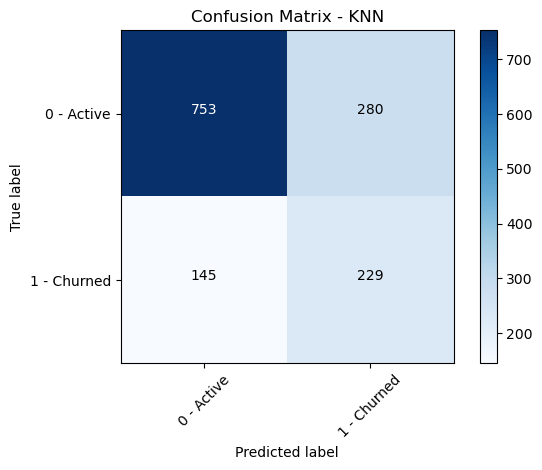

In [32]:
#plot confusion matrix for the KNN model
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds_knn)
print(cnf_matrix)

# Plot confusion matrix
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [33]:
print("Classification Report for KNN model")
print(classification_report(y_test, y_preds_knn, target_names=['Active Customers', 'Churned Customers']))

Classification Report for KNN model
                   precision    recall  f1-score   support

 Active Customers       0.84      0.73      0.78      1033
Churned Customers       0.45      0.61      0.52       374

         accuracy                           0.70      1407
        macro avg       0.64      0.67      0.65      1407
     weighted avg       0.74      0.70      0.71      1407



## Support Vector Classifier



In [34]:
#Generate my base model  (default params)
base_svc = SVC()

#fit my base model
base_svc.fit(X_train_st, y_train_st)

#base predictions
y_pred_base_svc = base_svc.predict(X_test)

#record base SVC metrics (accuracy score and classification report)
result_base_svc = accuracy_score(y_test, y_pred_base_svc)
cr_base_svc = classification_report(y_test, y_pred_base_svc, target_names=['Active Customers', 'Churned Customers'])

#print accuracy score and classification report for base model
print("Accuracy score for base Support Vector classifier model is: ", result_base_svc)
print("The classification report for the base Support Vector Classifier:")
print(cr_base_svc)

Accuracy score for base Support Vector classifier model is:  0.7718550106609808
The classification report for the base Support Vector Classifier:
                   precision    recall  f1-score   support

 Active Customers       0.88      0.79      0.84      1033
Churned Customers       0.56      0.71      0.62       374

         accuracy                           0.77      1407
        macro avg       0.72      0.75      0.73      1407
     weighted avg       0.80      0.77      0.78      1407



In [35]:
#instantiate SVC classifer
svc = SVC()

#create my param grid
params_svc = {'C': [100,10, 1.0, 0.1, 0.01, 0.001],
'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

In [36]:
svc_grid = GridSearchCV(
    estimator= svc,
    param_grid = params_svc,
    scoring = 'accuracy',
    cv = 5,
    refit=True,
    return_train_score=True)

In [37]:
# fit our data to SVC model
svc_grid.fit(X_train_st, y_train_st)

#make predictions
y_preds_svc = svc_grid.predict(X_test)

#calculate the predicted probabilities
#y_prob_svc = svc_grid.predict_proba(X_test)[:,1]
#ran into memory issues with this line of code due to resource constraints and will exclude SVC from my ROC curve

In [38]:
# look at the best parameters and the best score
print("The best parameters for SVC are: ", svc_grid.best_params_)
print("Generating the best score: ", svc_grid.best_score_)

The best parameters for SVC are:  {'C': 100, 'kernel': 'rbf'}
Generating the best score:  0.8611338963565267


[[837 196]
 [177 197]]


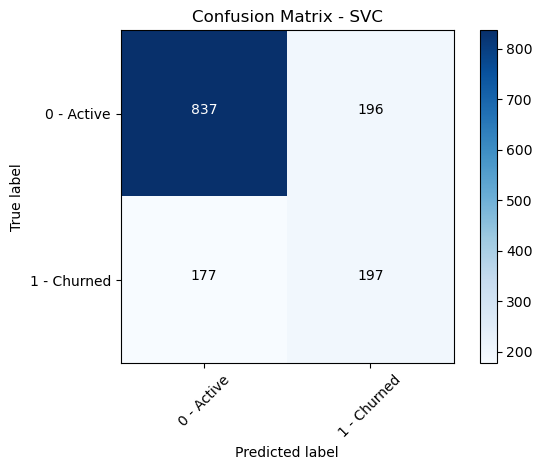

In [39]:
#plot confusion matrix for the KNN model
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_preds_svc)
print(cnf_matrix)

# Plot confusion matrix
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVC')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [40]:
print("Classification Report for SVC model")
print(classification_report(y_test, y_preds_svc, target_names=['Active Customers', 'Churned Customers']))

Classification Report for SVC model
                   precision    recall  f1-score   support

 Active Customers       0.83      0.81      0.82      1033
Churned Customers       0.50      0.53      0.51       374

         accuracy                           0.73      1407
        macro avg       0.66      0.67      0.67      1407
     weighted avg       0.74      0.73      0.74      1407



## ROC curve comparing the results of the models

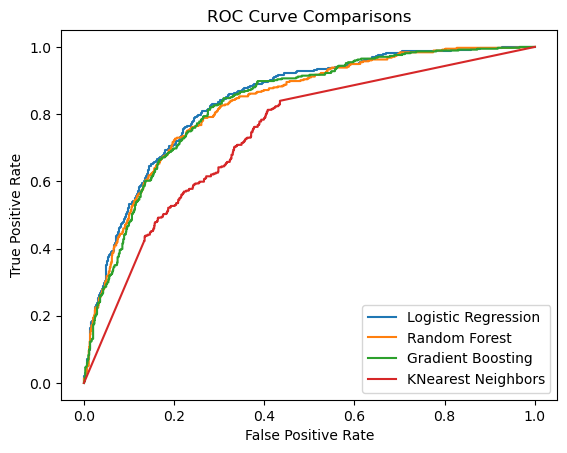

In [41]:
#compute the ROC for the lr model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)

#compute the ROC for the rf model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

#compute the ROC for the gb model
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

#compute the ROC for the knn model
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)


#plot the ROC curve
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label= 'Random Forest' )
plt.plot(fpr_gb, tpr_gb, label = 'Gradient Boosting')
plt.plot(fpr_knn, tpr_knn, label = 'KNearest Neighbors')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Comparisons')
plt.legend()
plt.show()

Conclusion:  Out of the five models attempted, all of the scores were very similar.  However, the one that slightly edges out the rest is the logistic regression model, given that it
is computationally less expensive than the other models.  However, I would most likely try additional preprocessing steps to see how they impact the model.  For example, trying the models leveraging a MinMaxScaler vs StandardScaler.  I would also potentially try running the models again, using a different resampling method, perhaps Random Over sampling, or ADASYN.  